# Matplotlib

Matplotlib – один із найпопулярніших пакетів Python, які використовуються для візуалізації даних. Це кроссплатформова бібліотека для створення 2D графіків даних. Matplotlib написаний на Python і використовує NumPy. Він надає об'єктно-орієнтуваний API, який допомагає вбудовувати графіки в програми, використовуючи набори інструментів Python GUI, такі як PyQt, Tkinter тощо. Він також може використовуватися в Python та IPython, ноутбуках Jupyter та серверах веб-додатків.

In [27]:
# pip install matplotlib

Після встановлення бібліотеки matplotlib викликається в консолі або скрипті як модуль:

In [28]:
import matplotlib as mpl

# Виведення на екран поточної версії бібліотеки matplotlib
print ('Current version on matplotlib library is', mpl.__version__)

Current version on matplotlib library is 3.5.1


In [29]:
from pylab import rcParams 

rcParams['figure.figsize'] = 10, 5 

Matplotlib складається з багатьох модулів. Модулі наповнені різними класами та функціями, які ієрархічно пов'язані між собою.

Створення малюнка в matplotlib схоже на малювання в реальному житті. Так художнику потрібно взяти основу (полотно чи папір), інструменти (пензлі чи олівці), мати уявлення про майбутній малюнок (що саме він малюватиме) і, нарешті, виконати все це і намалювати малюнок деталь за деталлю.

У matplotlib всі ці етапи також існують, і як художник-виконавець тут виступає сама бібліотека. Від користувача потрібно керувати діями художника-matplotlib, визначаючи, що саме він повинен намалювати і якими інструментами. Зазвичай створення основи і процес безпосередньо відображення малюнка віддає повністю на відкуп matplotlib. Таким чином, користувач бібліотеки matplotlib виступає у ролі управлінця. І чим простіше йому керувати кінцевим результатом роботи matplotlib, тим краще.

Оскільки matplotlib організована ієрархічно, а найпростішими для розуміння людиною є найвищі рівні, то знайомство з matplotlib починають з самого високорівневого інтерфейсу matplotlib.pyplot. Так, щоб намалювати гістограму за допомогою цього модуля, потрібно викликати лише одну команду: `matplotlib.pyplot.hist(arr)`.

Інтерфейс `matplotlib.pyplot` є набором команд та функцій, які роблять синтаксис графічних matploltib команд схожим на команди, що використовуються у середовищі MATLAB. Спочатку matplotlib планувався як вільна альтернатива MATLAB, де в одному середовищі були засоби як для малювання, так і для чисельного аналізу. Саме так у Matplotlib з'явився pylab, який поєднує модулі pyplot і numpy в один простір імен.

### Ієрархічна структура малюнка в matplotlib

Головною одиницею (об'єктом найвищого рівня) під час роботи з matplotlib є малюнок (Figure). Будь-який малюнок у matplotlib має вкладену структуру. Користувацька робота передбачає операції з різними рівнями: 

> Figure(Малюнок) -> Axes(Область малювання) -> Axis(Координатна вісь) -> Artists (Елементи малюнка)

+ **Малюнок (Figure)**

Малюнок є об'єктом найвищого рівня, на якому розташовуються одна або кілька областей малювання (Axes), елементи малюнка Artisits (заголовки, легенда тощо) та основа-полотно (Canvas). На малюнку може бути кілька областей малювання Axes, але ця область малювання Axes може належати лише одному малюнку Figure.

+ **Область малювання (Axes)**

Область малювання є об'єктом середнього рівня, який, мабуть, є головним об'єктом роботи з графікою matplotlib в об'єктно-орієнтованому стилі. Це те, що асоціюється зі словом "plot", це частина зображення з простором даних. Кожна область малювання Axes містить дві (або три у разі тривимірних даних) координатних осі (Axis об'єктів), які впорядковують відображення даних.

+ **Координатна вісь (Axis)**

Координатна вісь є об'єктом середнього рівня, який визначає область зміни даних, на них наносяться поділи ticks та підписи до поділів ticklabels. Розташування поділок визначається об'єктом Locator, а підписи поділів обробляє об'єкт Formatter. Конфігурація координатних осей полягає у комбінуванні різних властивостей об'єктів Locator та Formatter.

+ **Елементи малюнка (Artists)**

Елементи малюнка Artists є найменшим ієрархічним рівнем. Практично все, що відображається на малюнку, є елементом малюнка (Artist), навіть об'єкти Figure, Axes і Axis. Елементи малюнка Artists включають такі прості об'єкти як текст (Text), плоска лінія (Line2D), фігура (Patch) та інші.

Коли відображається малюнок (figure rendering), всі елементи малюнка Artists наносяться на основу-полотно (Canvas). Більшість їх пов'язується з областю малювання Axes. Також елемент малюнка не може спільно використовуватися декількома областями Axes або переміщуватися з однієї на іншу.

### Pyplot

Інтерфейс pyplot дозволяє користувачеві зосередитись на виборі готових рішень та налаштуванні базових параметрів малюнка. Це його головна перевага, тому вивчення matplotlib краще починати саме з інтерфейсу pyplot.

Існує де-факто стандарт виклику pyplot у python:

In [30]:
# стандарт виклику pyplot в python
import matplotlib.pyplot as plt

Малюнки matplotlib створюються шляхом послідовного виклику команд: або в інтерактивному режимі (в консолі), або в скрипті (текстовий файл з python-кодом). Графічні елементи (точки, лінії, фігури тощо) нашаровуються одна на одну послідовно. У цьому наступні перекривають попередні, якщо вони займають загальні ділянки малюнку (регулюється параметром zorder**).

У matplotlib працює правило "поточної області" ("current axes"), яке означає, що всі графічні елементи наносяться на поточну область малювання. Незважаючи на те, що областей малювання може бути декілька, одна з них завжди є поточною.

Як сказано вище найголовнішим об'єктом в matplotlib є малюнок Figure. Тому створення наукової графіки слід розпочинати саме зі створення малюнка. Створити малюнок у matplotlib означає задати форму, розміри та властивості основи-полотна (canvas), на якому буде створюватися майбутній графік.

Створити рисунок figure дозволяє метод plt.figure(). Після виклику будь-якої графічної команди, тобто функції, яка створює будь-який графічний об'єкт, наприклад plt.scatter() або plt.plot(), завжди існує хоча б одна область для малювання (за замовчуванням прямокутної форми).

Щоб результат малювання, тобто поточний стан малюнка, відобразився на екрані, можна скористатися командою plt.show(). Буде показано всі малюнки (figures), які були створені.

[]
<class 'matplotlib.figure.Figure'>
[<AxesSubplot: >]


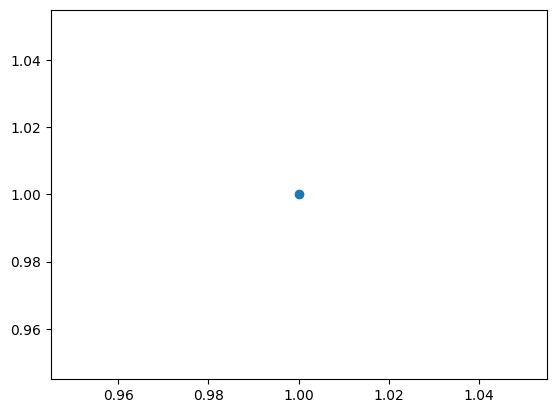

In [1]:
import matplotlib.pyplot as plt

fig = plt.figure()   # Створення об'єкту Figure
print (fig.axes) # Список поточних областей малювання порожній
print (type(fig)) # тип об'єкта Figure
plt.scatter(1.0, 1.0) # scatter - метод нанесення маркера в точці (1.0, 1.0)

# Після нанесення графічного елемента у вигляді маркера
# Список поточних областей складається з однієї області
print (fig.axes)

plt.show()

Щоб зберегти малюнок, що вийшов, потрібно скористатися методом `plt.savefig()`. Він зберігає поточну конфігурацію поточного малюнка в графічний файл з деяким розширенням (png, jpeg, pdf та інших.), який можна задати через параметр fmt. Тому її потрібно викликати в кінці вихідного коду після всіх виклику всіх інших команд. Якщо в python-скрипті створити кілька малюнків figure і спробувати зберегти їх однією командою `plt.savefig()`, то буде збережено останній малюнок figure.

<class 'matplotlib.axes._axes.Axes'>


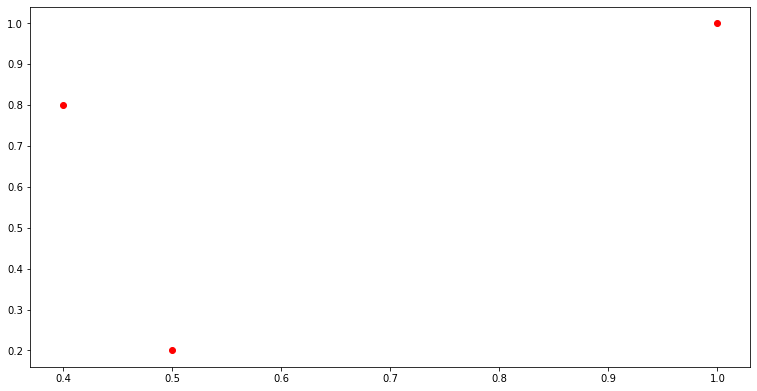

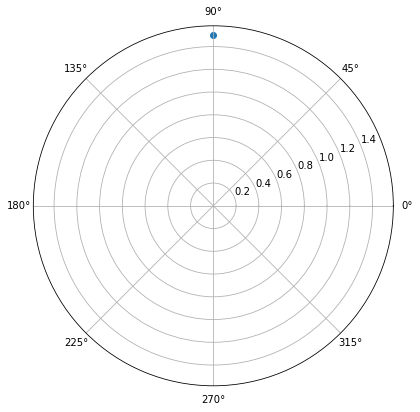

In [40]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
# Додавання на малюнок прямокутної (за замовчуванням) області малювання
ax = fig.add_axes([0, 0, 1, 1])
print (type(ax))
plt.scatter([1.0, 0.5, 0.4], [1.0, 0.2, 0.8], color='red')
plt.savefig('example 142a.png')


fig = plt.figure()
# Додавання на малюнок кругової області малювання
ax = fig.add_axes([0, 0, 1, 1], polar=True)
plt.scatter(np.pi/2, 1.5)
plt.savefig('example 142b.png')

plt.show()

### Елементи малюнка Artists

Весь простір малюнка Figure (прямокутної чи іншої форми) можна використовувати для нанесення інших елементів малюнка, наприклад, контейнерів Axes, графічних примітивів у вигляді ліній, фігур, тексту тощо. У будь-якому випадку кожен малюнок можна структурно подати так:

1. Область малювання Axes
    + Заголовок області малювання -> `plt.title()`;

2. Вісь абсцис Xaxis
    + Підпис осі абсцис OX -> `plt.xlabel()`;

3. Вісь абсцис Yaxis
    + Підпис осі абсцис OY -> `plt.ylabel()`;

4. Легенда -> `plt.legend()`

5. Колірна шкала -> `plt.colorbar()`
    + Підпис горизонтальної осі абсцис OY -> `cbar.ax.set_xlabel()`;
    
    + Підпис вертикальної осі абсцис OY -> `cbar.ax.set_ylabel()`;

7. Поділ на осі абсцис OX -> `plt.xticks()`

8. Поділ на осі ординат OY -> `plt.yticks()`

C:\Users\user\AppData\Local\Temp\ipykernel_16164\2642037489.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.text(np.pi-0.5, 0,  '1 Axes', fontsize=26, bbox=dict(edgecolor='w', color='w'))
C:\Users\user\AppData\Local\Temp\ipykernel_16164\2642037489.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.text(0.1, 0, '3 Yaxis', fontsize=18, bbox=dict(edgecolor='w', color='w'), rotation=90)
C:\Users\user\AppData\Local\Temp\ipykernel_16164\2642037489.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.text(5, -0.9, '2 Xaxis', fontsize=18, bbox=dict(edgecolor='w', color='w'))
C:\Users\user\AppData\Local\Temp\ipykernel_16164\2642037489.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.text(5, 0.85, '6 Xticks', fontsize=12, bbox=dict(edgecolor='w', color='w'), rotation=9

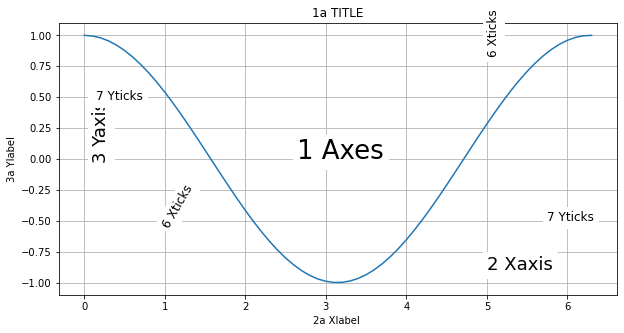

In [47]:
# Елементи простого малюнка 

import matplotlib.pyplot as plt
import numpy as np

lag = 0.1
x = np.arange(0.0, 2*np.pi+lag, lag)
y = np.cos(x)

fig = plt.figure()
plt.plot(x, y)

plt.text(np.pi-0.5, 0,  '1 Axes', fontsize=26, bbox=dict(edgecolor='w', color='w'))
plt.text(0.1, 0, '3 Yaxis', fontsize=18, bbox=dict(edgecolor='w', color='w'), rotation=90)
plt.text(5, -0.9, '2 Xaxis', fontsize=18, bbox=dict(edgecolor='w', color='w'))

plt.title('1a TITLE')
plt.ylabel('3a Ylabel')
plt.xlabel('2a Xlabel ')

plt.text(5, 0.85, '6 Xticks', fontsize=12, bbox=dict(edgecolor='w', color='w'), rotation=90)
plt.text(0.95, -0.55, '6 Xticks', fontsize=12, bbox=dict(edgecolor='w', color='w'), rotation=60)

plt.text(5.75, -0.5, '7 Yticks', fontsize=12, bbox=dict(edgecolor='w', color='w'))
plt.text(0.15, 0.475, '7 Yticks', fontsize=12, bbox=dict(edgecolor='w', color='w'))

plt.grid()

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16164\4157665229.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.text(2.5, 7, '1. Axes', fontsize=26, bbox=dict(edgecolor='w', color='w'))
C:\Users\user\AppData\Local\Temp\ipykernel_16164\4157665229.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.text(4, -0.5, '2. XAxis', fontsize=18, bbox=dict(edgecolor='w', color='w'))
C:\Users\user\AppData\Local\Temp\ipykernel_16164\4157665229.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.text(-0.5, 3.8, '3. YAxis', fontsize=18, bbox=dict(edgecolor='w', color='w'), rotation=90)
C:\Users\user\AppData\Local\Temp\ipykernel_16164\4157665229.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.text(6.3, 7.2, '4. Legend', fontsize=16, bbox=dict(edgecolor='w', color='w'))
C:\Users\

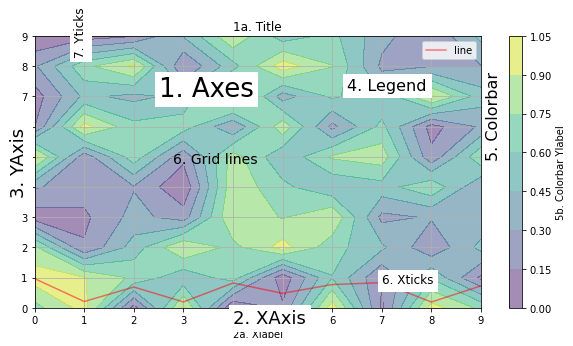

In [50]:
# Елементи складнішого малюнка

import matplotlib.pyplot as plt
import numpy as np

N = 100
n = np.sqrt(N)
x = np.arange(int(n))
# Задаємо вибірку з Гамма-розподілу з параметрами форми=1. та масштабу = 0.
z = np.random.random(N).reshape(int(n), int(n))
y = z[5,:]

fig = plt.figure()
cc = plt.contourf(z, alpha=0.5) # тривимірне поле
plt.plot(x, y, label='line', color='red', alpha=0.5) # червона лінія

plt.title('1a. Title') # заголовок
plt.xlabel('2a. Xlabel') # підпис осі OX
plt.ylabel('3a. Ylabel') # підпис осі OY
plt.legend() # легенда
cbar = plt.colorbar(cc) # колірна шкала

plt.text(2.5, 7, '1. Axes', fontsize=26, bbox=dict(edgecolor='w', color='w'))
plt.text(4, -0.5, '2. XAxis', fontsize=18, bbox=dict(edgecolor='w', color='w'))
plt.text(-0.5, 3.8, '3. YAxis', fontsize=18, bbox=dict(edgecolor='w', color='w'), rotation=90)
plt.text(6.3, 7.2, '4. Legend', fontsize=16, bbox=dict(edgecolor='w', color='w'))
plt.text(9.1, 5., '5. Colorbar', fontsize=16, bbox=dict(edgecolor='w', color='w'), rotation=90)
plt.text(7., 0.8, '6. Xticks', fontsize=12, bbox=dict(edgecolor='w', color='w'))
plt.text(0.8, 8.4, '7. Yticks', fontsize=12, bbox=dict(edgecolor='w', color='w'), rotation=90)

# Підписи для колірних шкал мають відмінний від інших підписів синтаксис
cbar.ax.set_xlabel('5a. Colorbar Xlabel', color='k', rotation=30)
cbar.ax.set_ylabel('5b. Colorbar Ylabel', color='k')

plt.text(2.8, 4.8,'6. Grid lines', fontsize=14)
plt.grid(True)

plt.show()

In [48]:
z

array([[0.139681  , 0.17209068, 0.84317696, 0.74458524, 0.8563133 ,
        0.0766565 , 0.54682769, 0.17962121, 0.04445461, 0.43456924],
       [0.06923508, 0.43761687, 0.60201308, 0.97891662, 0.24927613,
        0.77326292, 0.17823005, 0.31245783, 0.46600335, 0.21471435],
       [0.72475378, 0.23161082, 0.31742179, 0.72450328, 0.51573361,
        0.57567482, 0.94813811, 0.84656097, 0.79739283, 0.04990188],
       [0.55634122, 0.07449583, 0.68343605, 0.27352435, 0.65854863,
        0.59335971, 0.36995555, 0.30910023, 0.49630207, 0.94317078],
       [0.81642635, 0.31846575, 0.9768384 , 0.51754336, 0.14685389,
        0.37201165, 0.94410833, 0.42977128, 0.43577582, 0.2578492 ],
       [0.44541308, 0.74736802, 0.45705683, 0.95515104, 0.3971893 ,
        0.3845097 , 0.60179216, 0.4026829 , 0.53902127, 0.28311685],
       [0.71768656, 0.5170026 , 0.83476015, 0.07145783, 0.1799666 ,
        0.13317376, 0.90890797, 0.83281138, 0.65772857, 0.17056333],
       [0.552199  , 0.55860828, 0.3967844

### Властивості графічних елементів
 
Розмаїття і зручність створення графіки в matplotlib забезпечується не тільки за рахунок створених графічних команд, а й за рахунок багатого арсеналу щодо конфігурації типових форм. Це налаштування включає роботу з кольором, формою, типом лінії або маркера, товщиною ліній, ступенем прозорості елементів, розміром і типом шрифту та іншими властивостями.

Параметри, які визначають ці властивості у різних графічних командах, зазвичай мають однаковий синтаксис, тобто називаються однаково. Стандартним способом задання властивостей будь-якого створюваного об'єкта (або методу) є передача по ключу: ключ = значення. Назви параметрів зміни властивостей графічних об'єктів, що найчастіше зустрічаються, перераховані нижче:

+ *color/colors/c* - колір;

+ *linewidth/linewidths* - товщина лінії;

+ *linestyle* - тип лінії;

+ *alpha* - ступінь прозорості (від повністю прозорого 0 до непрозорого 1);

+ *fontsize* - розмір шрифту;

+ *marker* - тип маркера;

+ *s* - розмір маркера у методі plt.scatter (тільки цифри);

+ *rotation* - Поворот рядка на X градусів.


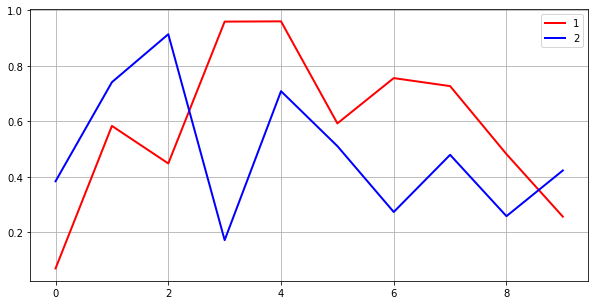

In [51]:
def f_plot(*args, **kwargs):

    xlist = []
    ylist = []
    for i, arg in enumerate(args):
        if(i % 2 == 0):
            xlist.append(arg)
        else:
            ylist.append(arg) 
    
    colors = kwargs.pop('colors', 'k')
    linewidth = kwargs.pop('linewidth', 1.)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    i = 0
    for x, y, color in zip(xlist, ylist, colors):
        i += 1
        ax.plot(x, y, color=color, linewidth=linewidth, label=str(i))
    
    ax.grid(True)
    ax.legend()

colors = ['red', 'blue']
N = 10
x = np.arange(N)
y2 = np.random.random(N)
y3 = np.random.random(N)

f_plot(x, y2, x , y3, colors=colors, linewidth=2.)

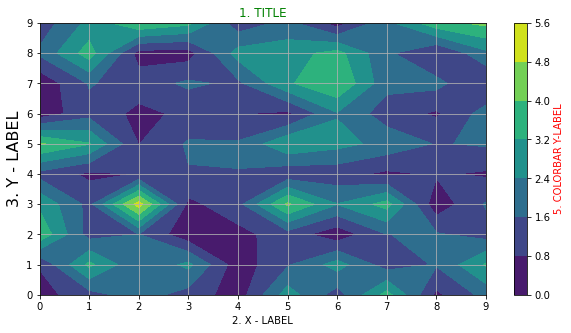

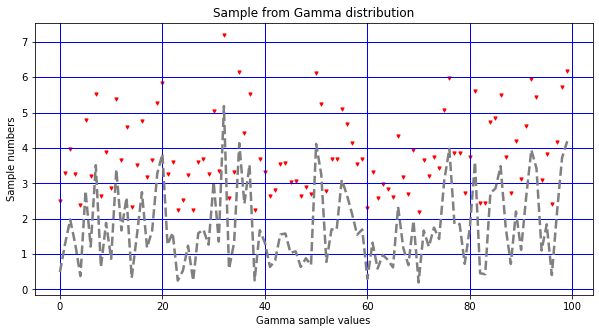

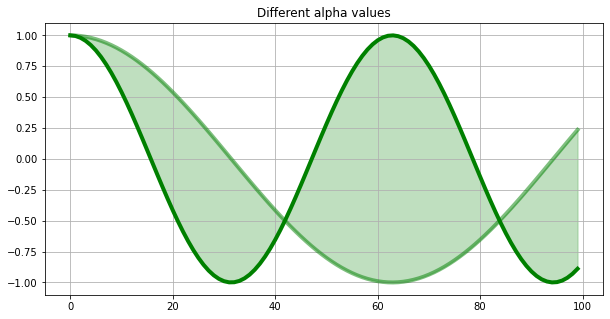

In [57]:
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)
# Задаємо вибірку з Гамма-розподілу з параметрами форми=1. та масштабу = 0.
z = np.random.gamma(2., 1., N)
z1 = np.cos(x/10.)
z2 = np.cos(x/20.)

y = z.reshape(10,10)
#y = np.cos(y)

fig = plt.figure()
cc = plt.contourf(y)
cbar = plt.colorbar(cc)

plt.title('1. TITLE', color='green')
plt.xlabel('2. X - LABEL')
plt.ylabel('3. Y - LABEL', fontsize=16)

# Підписи для колірних шкал мають відмінний від інших підписів синтаксис
cbar.ax.set_xlabel('4. COLORBAR X-LABEL', color='b')
cbar.ax.set_ylabel('5. COLORBAR Y-LABEL', color='r')
plt.grid(True)

fig = plt.figure()

my_dict = {'color' : 'grey', 'linewidth' : 2.5, 'linestyle' : '--'}
xz = [x, z]

# передача параметрів через список xz та словник my_dict. Наявність знаків * та ** обов'язкова!
cc = plt.plot(*xz, **my_dict)
# результат аналогічний такому запису
#cc = plt.plot(x, z, color='grey', linewidth=2.5, linestyle='--')

plt.scatter(x, y + 2.0, marker='v', s=10, color='red')

plt.title('Sample from Gamma distribution')
plt.xlabel('Gamma sample values')
plt.ylabel('Sample numbers')

# Підписи для колірних шкал мають відмінний від інших підписів синтаксис
cbar.ax.set_xlabel('4. COLORBAR X-LABEL', fontsize=8)
cbar.ax.set_ylabel('5. COLORBAR Y-LABEL', color='r')
plt.grid(True, color='blue', linewidth=1.0)

fig = plt.figure()

# створення словника
my_dict = {'color' : 'green', 'linewidth' : 4.0, 'alpha' : 0.5}

plt.fill_between(x, z2, z1, color='green', alpha=0.25)
plt.plot(x, z1, color='green', linewidth=4.0)
plt.plot(x, z2, **my_dict)
plt.title('Different alpha values')
plt.grid(True)

plt.show()

In [55]:
xz

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([1.29060804, 3.30169921, 2.21336478, 1.59326676, 1.24786611,
        2.06738693, 3.26327872, 0.2580477 , 0.51637926, 2.68388991,
        2.44012203, 2.52777961, 3.99765267, 2.9307324 , 7.3525467 ,
        0.48564494, 3.18741179, 0.86525183, 1.16174251, 0.78820093,
        0.85008315, 2.38324868, 5.3491225 , 1.35913964, 0.71001915,
        1.44003699, 0.2709249 , 0.64182907, 2.18622672, 4.19643485,
        2.13368911, 4.28172118, 0.95305349, 0.3941787 , 1.49810813,
        3.79112677, 5.30356093, 0.44472964, 2.26497258, 2.82121979,
      

### Графічні команди

У Matplotlib закладені як прості графічні команди, так і досить складні. Доступ до них через pyplot означає використання синтаксису виду "`plt.назва_команди()`".

Найбільш поширені команди для створення наукової графіки в matplotlib є:

**I. Найпростіші графічні команди:**

+ `plt.scatter()` - маркер або точкове малювання;

+ `plt.plot()` - ламана лінія;

+ `plt.text()` - нанесення тексту;

**II. Діаграми:**

+ `plt.bar()`, `plt.barh()`, `plt.barbs()`, `broken_barh()` - стовпчаста діаграма;

+ `plt.hist()`, `plt.hist2d()`, `plt.hlines` - гістограма;

+ `plt.pie()` - кругова діаграма;

+ `plt.boxplot()` - "ящик з вусами" (boxwhisker);

+ `plt.errorbar()` - оцінка похибки, "вуса".

**III. Зображення в ізолініях:**

+ `plt.contour()` - ізолінії;

+ `plt.contourf()` - ізолінії з пошаровим забарвленням;

**IV. Відображення:**

+ `plt.pcolor()`, `plt.pcolormesh()` - псевдокольорове зображення матриці (2D масиву);

+ `plt.imshow()` - вставка графіки (пікселі + згладжування);

+ `plt.matshow()` - відображення даних у вигляді квадратів.

**V. Заливання:**

+ `plt.fill()` - заливка багатокутника;

+ `plt.fill_between()`, `plt.fill_betweenx()` - заливка між двома лініями;

**VI. Векторні діаграми:**

+ `plt.streamplot()` - лінії струму;

+ `plt.quiver()` - векторне поле.

[Повний список команд](http://matplotlib.org/api/pyplot_summary.html), доступний для pyplot, можна дізнатися на офіційному сайті matplotlib. У списку немає команд для малювання різних геометричних фігур (коло, багатокутники тощо). Це пов'язане з тим, що у matplotlib вони викликаються через **matplotlib.patches**. 

Scatter:  <class 'matplotlib.collections.PathCollection'>
Plot:  1 [<matplotlib.lines.Line2D object at 0x0000027B9AC74A30>]
Text:  <class 'matplotlib.text.Text'>


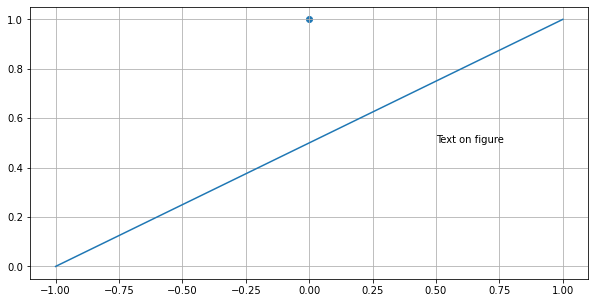

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure()
# Додавання на малюнок прямокутної (за замовчуванням) області малювання
scatter1 = plt.scatter(0.0, 1.0)
print('Scatter: ', type(scatter1))

graph1 = plt.plot([-1.0, 1.0], [0.0, 1.0])
print('Plot: ', len(graph1), graph1)

text1 = plt.text(0.5, 0.5, 'Text on figure')
print('Text: ', type(text1))

grid1 = plt.grid(True)   # лінії допоміжної сітки

plt.show()

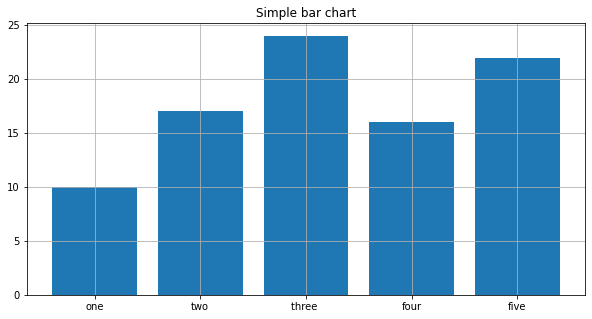

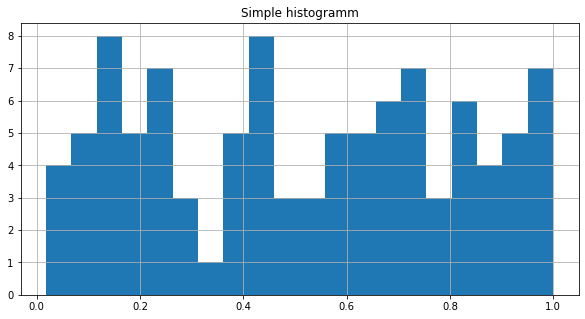

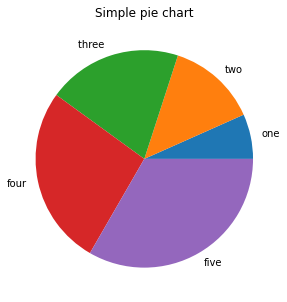

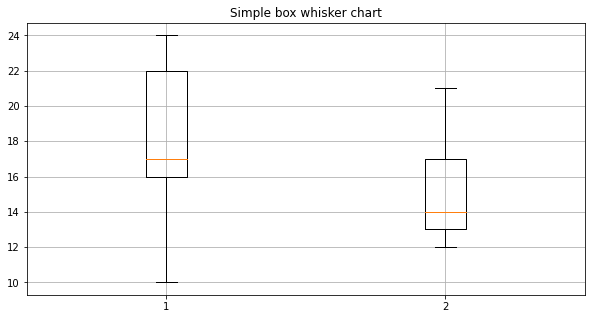

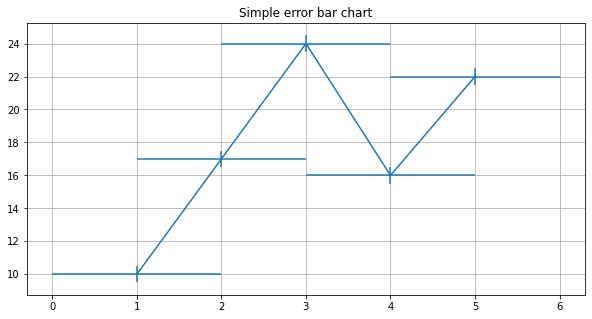

In [35]:
import matplotlib.pyplot as plt
import numpy as np

s = ['one','two','three ','four' ,'five']
x = [1, 2, 3, 4, 5]
z = np.random.random(100)
z1 = [10, 17, 24, 16, 22]
z2 = [12, 14, 21, 13, 17]

# bar()
fig = plt.figure()
plt.bar(s, z1)
plt.title('Simple bar chart')
plt.grid(True)   # лінії допоміжної сітки

# hist()
fig = plt.figure()
plt.hist(z, bins=20)
plt.title('Simple histogramm')
plt.grid(True)

# pie()
fig = plt.figure()
plt.pie(x, labels=s)
plt.title('Simple pie chart')

# boxplot()
fig = plt.figure()
plt.boxplot([z1, z2])
plt.title('Simple box whisker chart')
plt.grid(True)

# errorbar()
fig = plt.figure()
plt.errorbar(x, z1, xerr=1, yerr=0.5)
plt.title('Simple error bar chart')
plt.grid(True)

plt.show()

### Методи ізоліній

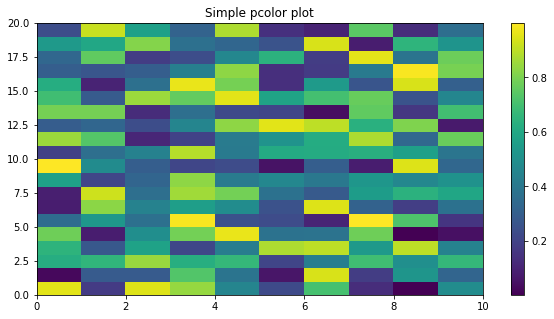

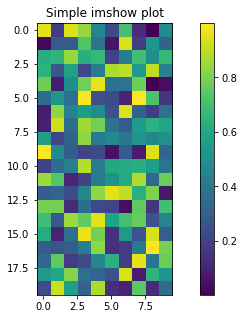

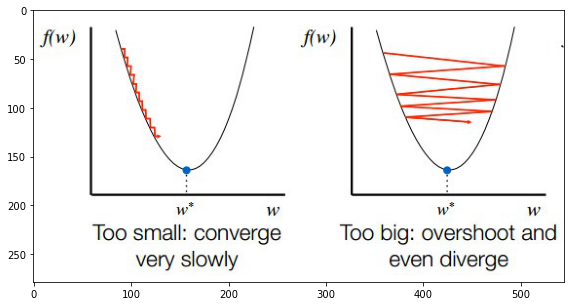

In [58]:
import matplotlib.pyplot as plt
import numpy as np

dat = np.random.random(200).reshape(20,10) # створюємо матрицю значень

fig = plt.figure()
pc = plt.pcolor(dat) # метод псевдографіки pcolor
plt.colorbar(pc)
plt.title('Simple pcolor plot')

fig = plt.figure()
me = plt.imshow(dat) 
plt.colorbar(me)
plt.title('Simple imshow plot')

fig = plt.figure()
plt.imshow(plt.imread('convergence.jpg')) 

plt.show()

### Методи відображення

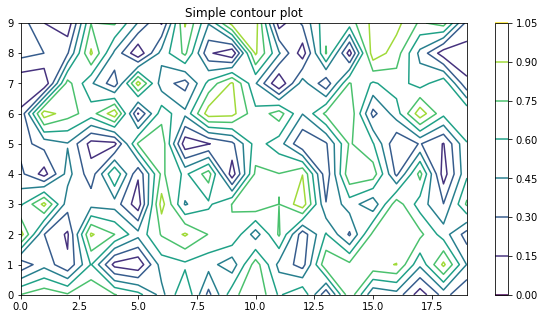

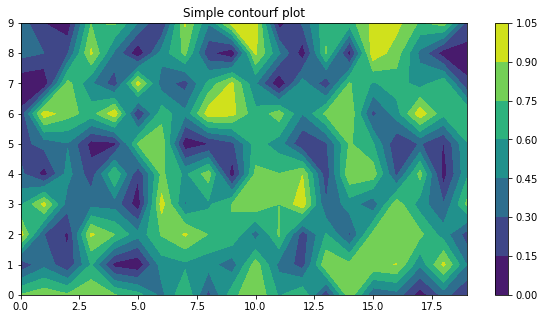

<Figure size 720x360 with 0 Axes>

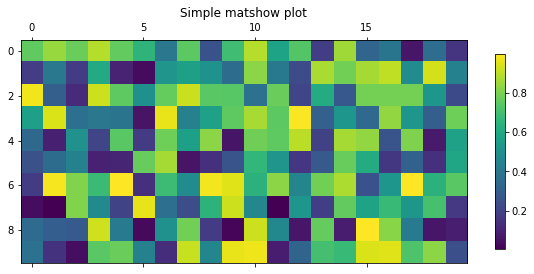

In [37]:
import matplotlib.pyplot as plt
import numpy as np

dat = np.random.random(200).reshape(10,20) # створюємо матрицю значень

fig = plt.figure()
cr = plt.contour(dat) 
plt.colorbar(cr)
plt.title('Simple contour plot')

fig = plt.figure()
cf = plt.contourf(dat) 
plt.colorbar(cf)
plt.title('Simple contourf plot')

fig = plt.figure()
cf = plt.matshow(dat) 
plt.colorbar(cf, shrink=0.7)
plt.title('Simple matshow plot')

plt.show()

### Методи заливання

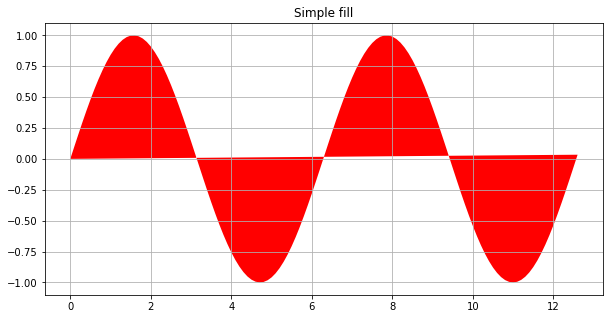

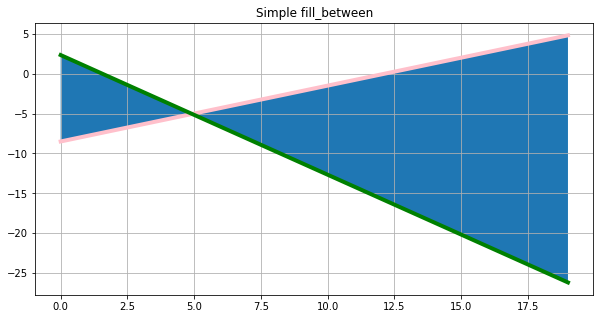

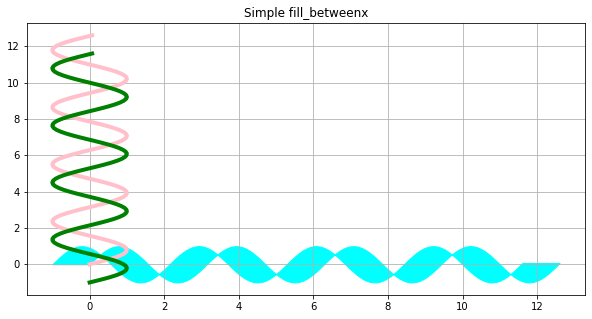

In [42]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 4*np.pi+0.1, 0.1)
y = np.sin(x)
z = np.sin(2*x)

x2 = np.arange(20)
y2 = -1.5*x2 + 2.33
z2 = 0.7*x2 - 8.5 

# fill()
fig = plt.figure()
plt.fill(x, y, 'r') # метод псевдографіки pcolor
plt.title('Simple fill')
plt.grid(True)

# fill_between()
fig = plt.figure()
plt.plot(x2, z2, color='pink', linewidth=4.0)
plt.plot(x2, y2, color='g', linewidth=4.0)
plt.fill_between(x2, y2, z2) 
plt.title('Simple fill_between')
plt.grid(True)

# fill_betweenx()
fig = plt.figure()
plt.plot(z, x, color='pink', linewidth=4.0)
plt.plot(z, x-1.0, color='g', linewidth=4.0)
plt.fill_betweenx(z, x, x-1.0, color='cyan')
plt.title('Simple fill_betweenx')
plt.grid(True)

plt.show()

### Векторні діаграми

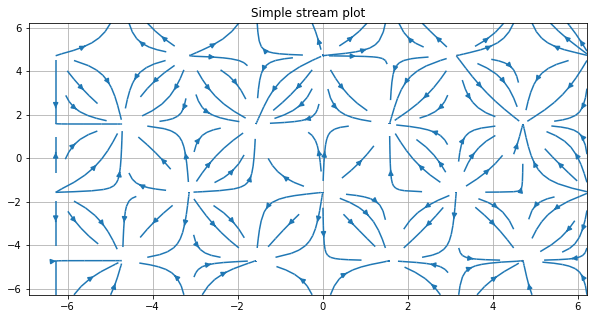

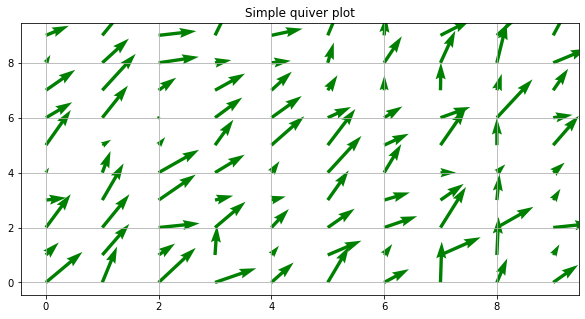

In [43]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-2*np.pi, 2*np.pi, 0.1)
u = np.sin(x)*np.cos(x)
v = np.cos(x)
uu, vv = np.meshgrid(u,v)

N = 100
x1 = np.random.random(N).reshape((10, 10))
y1 = np.random.random(N).reshape((10, 10))

# streamplot()
fig = plt.figure()
plt.streamplot(x, x, uu, vv) 
plt.title('Simple stream plot')
plt.grid(True)

# quiver()
fig = plt.figure()
plt.quiver(x1, y1, color='green') 
plt.title('Simple quiver plot')
plt.grid(True)

plt.show()

### Методи створення мультивікон

У matplotlib реалізовано кілька способів створення малюнків із кількома областями для діаграм (multi-panel plots):

1. **`fig.add_axes()`** - базовий метод, зручний при створенні діаграми-врізання;

2. **`fig.add_subplot()`** - додавання одного subplot на рисунок. Зручно для відображення 2-3 діаграми;

3. **`plt.subplot()`** - аналогічний попередньому за результатом метод для pyplot;

4. **`plt.subplots()`** - зручний метод для автоматизованого створення кількох subplots;

5. **`plt.GridSpec()`** - метод для об'єднання осередків subplots у складніші конфігурації. Дозволяє створювати різні за формою subplots на малюнку.

Перші два методи (з приставкою `add_`) є низькорівневими, і для їх виклику потрібен об'єкт Figure. Останні три методи реалізовані в pyplot інтерфейсі. Кожен із цих методів створює один або більше екземплярів типу subplot (у прикладах буде наведено точний тип цього об'єкта) або axes. Кожен такий об'єкт - окрема область малювання і до неї застосовні всі прийоми, які ми розглянули в попередньому розділі, коли працювали з екземпляром-об'єктом типу axes. Хоча метод `fig.add_axes` створює об'єкт типу Axes, а решта - типу AxesSubplot, тобто різні типи об'єктів, але вони є спорідненими, і працювати з ними можна одними і тими ж методами.

Найпростішим способом розбити, тобто поділити малюнок на кілька частин є спосіб `fig.add_subplot()`. Сенс створення subplots полягає в тому, що вони наповнюють малюнок осередками (як у таблиці) у кожній з яких тепер можна створювати свій власний графік чи діаграму (або карту-схему).

Метод `fig.add_subplot()` завжди має три обов'язкові аргументи: число осередків по вертикалі (число рядків), число осередків по горизонталі (число стовпців) та номер осередку (відлік ведеться від 1 зліва направо, зверху вниз). Три числа перераховані через кому (3,2,5) або триплет у вигляді одного числа (325), передані методом fig.add_subplot(), створюють екземпляр (instance) "matplotlib.axes._subplots.AxesSubplot", що є підвидом ширшого класу "matplotlib.axes".

`fig.add_subplot()` оптимальний, коли необхідно швидко зобразити декілька (зазвичай 2-3) графіків-діаграм поруч. Бажано при цьому, щоб вони не перекривалися, за винятком випадків, коли області малюнка "злипаються" і утворюють загальні межі (як осі абсцис, так і осі ординат).

Область 1 AxesSubplot(0.125,0.125;0.352273x0.755)
<class 'matplotlib.axes._subplots.AxesSubplot'>
Область 2 AxesSubplot(0.547727,0.125;0.352273x0.755)


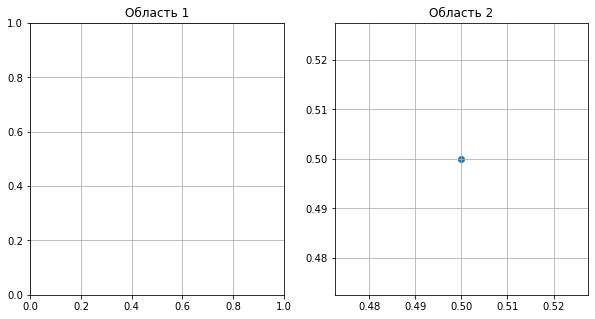

In [59]:
import matplotlib.pyplot as plt

fig = plt.figure()

tri = 121
ax1 = fig.add_subplot(tri)
ax1.set_title(u'Область 1')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title(u'Область 2')

ax2.scatter(0.5, 0.5)

# Дізнаємося координати областей, які займають subplots
print(u'Область 1', ax1)
print(type(ax1))
print(u'Область 2',ax2)

# Нарисуем в каждом subplot линию сетки
for ax in fig.axes:
    ax.grid(True)
        
plt.show()

In [60]:
fig.axes

[<AxesSubplot:title={'center':'Область 1'}>,
 <AxesSubplot:title={'center':'Область 2'}>]

Аналогічного результату можна досягти і "в лоб", тобто самостійно задати межі потрібних областей. Для прямого виділення положення областей малюнку потрібно використовувати метод `fig.add_axes()`. На малюнку у відносних координатах (від 0 до 1) можна задати кілька (скільки завгодно) областей, на кожній з яких можна буде малювати графіки та діаграми (не забуваймо про карти та зображення-фотографії). Кожна область задається окремо і вимагає вказати параметри кордону як списку [ліва, нижня, ширина, висота]. Варто зазначити, що цей метод дозволяє задати багато важливих налаштувань створюваної області малювання і зокрема тип області малювання (якщо параметр `polar=True` або `projection='polar'`, то область малювання буде не прямокутною, а круговою).

Область 1 Axes(0.125,0.547727;0.775x0.352273)
<class 'matplotlib.axes._axes.Axes'>
Область 2 Axes(0.125,0.125;0.775x0.352273)


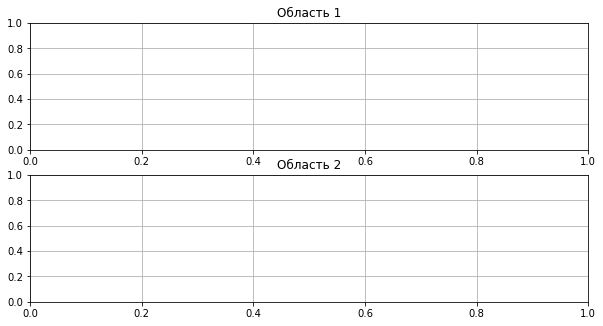

In [61]:
import matplotlib.pyplot as plt

fig = plt.figure()

# У прикладі для завдання меж областей була використана інформація
# про межі subplots з попереднього прикладу

ax1 = fig.add_axes([0.125, 0.547727, 0.775, 0.352273])
ax1.set_title(u'Область 1')
ax2 = fig.add_axes([0.125, 0.125, 0.775, 0.352273])
ax2.set_title(u'Область 2')

# Дізнаємося координати областей, які займають subplots
print( u'Область 1', ax1)
print(type(ax1))
print(u'Область 2',ax2)

# Намалюємо у кожному subplot лінію сітки
for ax in fig.axes:
     ax.grid(True)
    
plt.show()

### Автоматизоване створення мультиокон

Для створення множини областей зручно не просто додавати їх на малюнок послідовно, по одному, а лише одним рядком розбити малюнок на кілька областей малювання. Це дозволяє зробити, наприклад, метод `plt.subplots()`, який вимагає вказати кількість рядків і стовпців створюваної таблиці кожна з осередків якої є об'єкт-екземпляр subplots. Метод повертає об'єкт типу figure та масив із створених subplots. Їх можна перебрати в циклі "в лоб", але краще скористатися перебором зі списку fig.axes, куди автоматично додаються всі області малювання поточного малюнка fig.

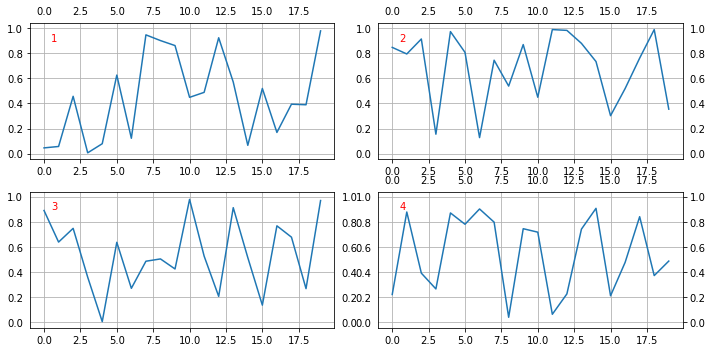

In [62]:
import numpy as np
import matplotlib.pyplot as plt

fig, subplots = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

x = np.arange(20)

i = -1
for ax in fig.axes:
    i += 1
    y = np.random.rand(np.size(x))
    ax.grid(True)
    ax.text(0.5, 0.9, str(i+1), color='red')
    ax.plot(x, y)
    if((i+1)%2 == 0):
        ax.tick_params(axis='y', labelleft='off', labelright='on', left=False, right=True)
    if((i==0) or (i==1)):
        ax.tick_params(axis='x', labelbottom='off', labeltop='off', left=False, right=True)     
    if((i==1) or (i==2)):
        ax.tick_params(axis='y', labelleft='off', labelright='off', left=False, right=False)
    if(i==3):
        ax.tick_params(axis='x', labelbottom='off', labeltop='off')        
    if(i==1):
        ax.tick_params(axis='x', labelbottom='off', labeltop='on')
    if(i==0):
        ax.tick_params(axis='y', left=True, right=False)

# Параметри підібрані емпірично, на око
plt.tight_layout(h_pad = -0.15, w_pad = -0.2)

plt.show()

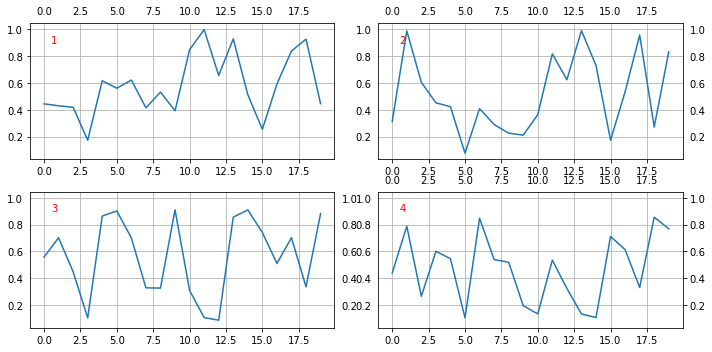

In [63]:
import numpy as np
import matplotlib.pyplot as plt

fig, subplots = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

x = np.arange(20)

i = -1
for k in range(2):
    for n in range(2):
        i += 1
        y = np.random.rand(np.size(x))
        subplots[k][n].grid(True)
        subplots[k][n].text(0.5, 0.9, str(i+1), color='red')
        subplots[k][n].plot(x, y)
        if((i+1)%2 == 0):
            subplots[k][n].tick_params(axis='y', labelleft='off', labelright='on', left=False, right=True)
        if((i==0) or (i==1)):
            subplots[k][n].tick_params(axis='x', labelbottom='off', labeltop='off', left=False, right=True)     
        if((i==1) or (i==2)):
            subplots[k][n].tick_params(axis='y', labelleft='off', labelright='off', left=False, right=False)
        if(i==3):
            subplots[k][n].tick_params(axis='x', labelbottom='off', labeltop='off')        
        if(i==1):
            subplots[k][n].tick_params(axis='x', labelbottom='off', labeltop='on')
        if(i==0):
            subplots[k][n].tick_params(axis='y', left=True, right=False)

# Параметри підібрані емпірично, на око
plt.tight_layout(h_pad = -0.15, w_pad = -0.2)

plt.show()

### Легенда

Створення легенди має на увазі два логічні етапи.

1. *Формування підписів до умовних позначень*;

2. *Відображення легенди на малюнку*.

Найпростіший спосіб сформувати підписи до графічних елементів - використовувати атрибут label у графічних командах типу `plot()`, `scatter()` та ін. Параметр label приймає текст у вигляді рядка, який "прив'язується" до графічного елементу, що породив їх (лінія маркер, діаграма і т.д.).

Відображення легенди здійснюється або методом plt.legend() для всього малюнка, або ax.legend() для конкретної області малювання.

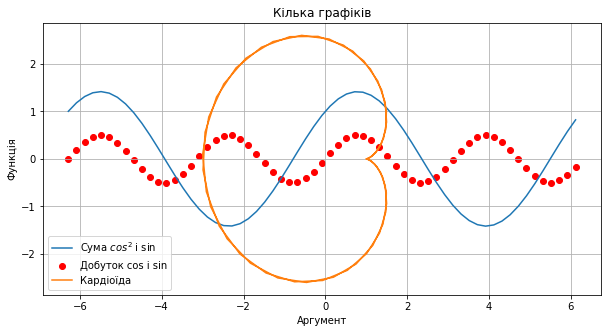

In [71]:
import matplotlib.pyplot as plt
import numpy as np

a = 1
x = np.arange(-2*np.pi, 2*np.pi, 0.2)
y = np.sin(x) * np.cos(x)
f = np.sin(x) + np.cos(x)
xz = a * (2 * np.cos (x) - np.cos (2 * x))
yz = a * (2 * np.sin(x) - np.sin(2 * x))

# Спосіб 1 за допомогою label
plt.plot(x, f, label = u'Сума $cos^2$ і sin')
plt.scatter(x, y, label = u'Добуток cos і sin', color='r')
plt.plot(xz, yz, label = u'Кардіоїда')

plt.grid(True)
plt.xlabel(u'Аргумент')
plt.ylabel(u'Функція')
plt.title(u'Кілька графіків')

plt.legend(loc='lower left') # легенда для всього малюнку fig

plt.show()

# Pandas + Matplotlib

Ми будемо аналізувати дані про спеціальність коледжу, отримані з вибірки міжроданих загальнодоступного користування американським співтовариством за 2010–2012 рр.

Спочатку завантажимо дані, передавши URL-адресу для завантаження в pandas.read_csv()

In [72]:
import pandas as pd

download_url = (
     "https://raw.githubusercontent.com/fivethirtyeight/"
     "data/master/college-majors/recent-grads.csv"
)

df = pd.read_csv(download_url)

#### Опис

Rank: Рейтинг за середнім заробітком

Major_code: 	Основний код, FO1DP в ACS PUMS

Major: 	Основний опис

Major_category: 	Категорія майора від Carnevale et al

Total: 	Загальна кількість осіб

Sample_size: 	Розмір вибору (незважень) ТІЛЬКИ повний робочий день, цілий рік ( використання для заробітку)

Men: 	Випускники чоловічої статі

Women: 	Випускниці

ShareWomen: 	Частка жінок від загальної

Employed: 	Кількість зайнятих (ESR == 1 або 2)

Full_time: 	Працює 35 годин і більше

Part_time: 	Працює менше 35 годин

Full_time_year_round: 	Працював мінімум 50 тижнів (WKW == 1) і не менше 35 годин (WKHP >= 35)

Unemployed: 	Кількість безробітних (ESR == 3)

Unemployment_rate: 	Безробітний / (Безробітний + Працевлаштований)

Median: 	Середній заробіток працівників, які працюють повний робочий день і працюють цілий рік

P25th: 	25 процент заробітку

P75th: 	75 процент заробітку

College_jobs: 	Номер з роботою, яка потребує вищої освіти

Non_college_jobs: 	Номер з роботою без ВШ

Low_wage_jobs: 	Кількість на низькооплачуваних роботах у сфері обслуговування

In [74]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [75]:
df.shape

(173, 21)

Наш набір даних містить кілька стовпців, пов’язаних із заробітками випускників кожної спеціальності:

- «Медіана» — це середній заробіток працівників, які працюють повний робочий день і працюють цілий рік.
- "P25th" - це 25-й відсоток прибутку.
- "P75th" - це 75-й відсоток прибутку.

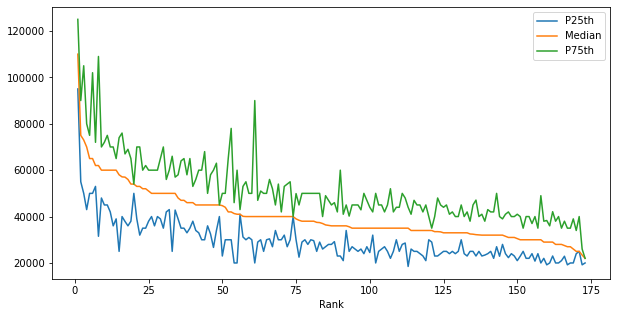

In [81]:
import matplotlib.pyplot as plt

df.plot(x="Rank", y=["P25th", "Median", "P75th"])
plt.show()

Деякі спеціальності мають великі розриви між 25-м і 75-м процентилем. Люди з цими ступенями можуть заробляти значно менше або значно більше, ніж середній дохід.

Інші спеціальності мають дуже невеликі розриви між 25-м і 75-м процентилем. Люди з цими ступенями отримують зарплату, дуже близьку до середнього доходу.

.plot() має декілька додаткових параметрів. Зокрема, параметр kind приймає одинадцять різних рядкових значень і визначає, який тип графіка ви створите:

1. "line" призначена для площ.
2. "bar" для вертикальних гістограм.
3. "barh" призначено для горизонтальних гістограм.
4. "box" призначена для коробкових ділянок.
5. "hexbin" призначений для графіків hexbin.
6. "hist" для гістограм.
7. «kde» призначено для діаграм оцінки щільності ядра.
8. "density" є псевдонімом для "kde".
9. "лінія" призначена для лінійних графіків.
10. "кругова діаграма" призначена для кругових діаграм.
11. "scatter" призначений для діаграм розсіювання.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

Значення за замовчуванням — «рядок». Лінійні графіки, як той, який ми створили вище, надають гарний огляд наших даних. Ми можемо використовувати їх для визначення загальних тенденцій. Вони рідко дають складну інформацію, але можуть дати нам підказки щодо того, де збільшити масштаб.

Якщо ми не надамо параметр для .plot(), тоді він створить лінійну діаграму з індексом на осі X і всіма числовими стовпцями на осі Y. Хоча це корисно за замовчуванням для наборів даних лише з кількома стовпцями, для набору даних спеціальностей коледжу та його кількох числових стовпців це виглядає як безлад.

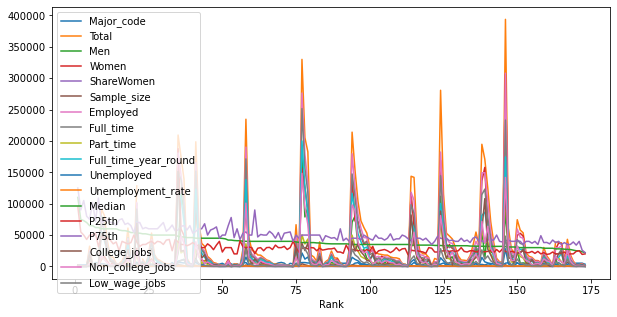

In [87]:
df.plot(x="Rank")
plt.show()

Коли ми викликаємо .plot() для об’єкта DataFrame, Matplotlib створює графік під капотом.

Щоб переконатися в цьому, спробуйте два фрагменти коду. Спочатку створимо графік за допомогою Matplotlib, використовуючи два стовпці нашого DataFrame:

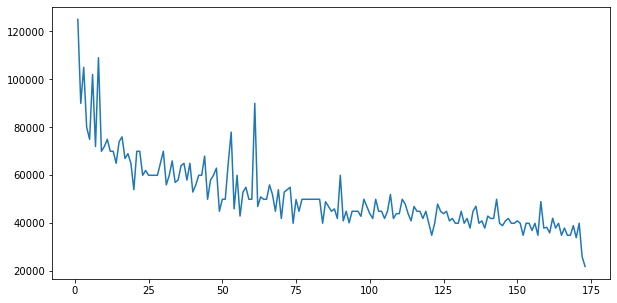

In [88]:
plt.plot(df["Rank"], df["P75th"])

<AxesSubplot:xlabel='Rank'>

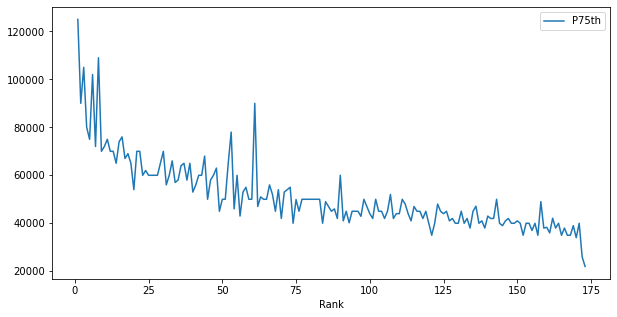

In [89]:
df.plot(x="Rank", y="P75th")

Гістограма — це хороший спосіб візуалізувати, як значення розподіляються в наборі даних. Гістограми групують значення в контейнери та відображають кількість точок даних, значення яких знаходяться в певному діапазоні.

Створимо гістограму для стовпця «Медіана»:

<AxesSubplot:ylabel='Frequency'>

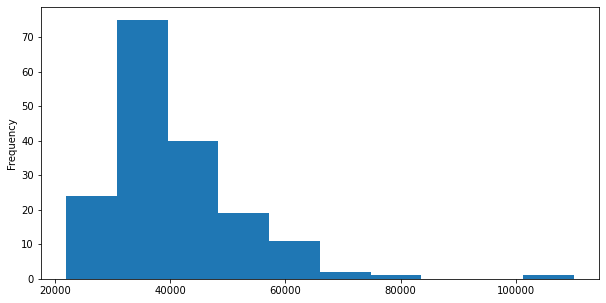

In [91]:
median_column = df["Median"]
median_column.plot(kind="hist")

Гістограма показує дані, згруповані в десять ящиків від 20 000 до 120 000 доларів США, а ширина кожного ящика становить 10 000 доларів. Гістограма має іншу форму, ніж нормальний розподіл, який має симетричну форму дзвона з піком посередині.

Проте гістограма медіанних даних досягає максимуму ліворуч нижче 40 000 доларів США. Хвіст тягнеться далеко вправо і говорить про те, що справді існують сфери, де спеціальності можуть розраховувати на значно вищі прибутки.

Здається, що одна точка даних має власну категорію. Спеціалісти в цій галузі отримують відмінну зарплату в порівнянні не тільки з середньою, але й з другою. Хоча це не є його основною метою, гістограма може допомогти нам виявити такий викид. Давайте дослідимо викид трохи більше:

1. Які спеціальності представляють цей викид?
2. Наскільки великий його ребро?

На відміну від першого погляду, ми хочемо порівняти лише кілька точок даних, але ми хочемо побачити більше деталей про них. Для цього чудовим засобом є барна ділянка. Спочатку виберемо п’ять спеціальностей із найвищими середніми доходами. Нам знадобляться два кроки:

- Щоб відсортувати за стовпцем «Медіана», скористаємося .sort_values() і вкажимо назву стовпця, за яким потрібно відсортувати, а також напрямок за зростанням=False.
- Щоб отримати перші п’ять пунктів нашого списку, використовуємо .head().

Давайте створимо новий DataFrame під назвою top_5:

In [92]:
top_5 = df.sort_values(by="Median", ascending=False).head()
top_5

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Тепер у нас є менший DataFrame, який містить лише п’ять найприбутковіших спеціальностей. Як наступний крок ми можемо створити стовпчасту діаграму, яка показуватиме лише спеціальності з п’ятьма найвищими середніми зарплатами:

<AxesSubplot:xlabel='Major'>

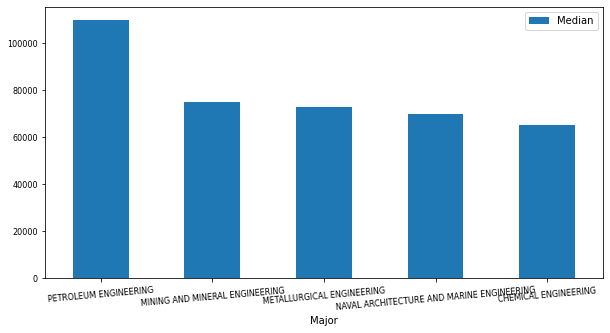

In [77]:
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=8)

Цей графік показує, що середня зарплата спеціалістів нафтового машинобудування більш ніж на 20 000 доларів вища, ніж у інших. Заробітки на спеціальностях, які займають друге-четверте місця, відносно близькі один до одного.

Якщо у нас є точка даних із значно вищим або нижчим значенням, ніж решта, ми, ймовірно, захочемо дослідити її трохи далі. Наприклад, ми можемо переглянути стовпці, які містять пов’язані дані.

Давайте дослідимо всі спеціальності, середня зарплата яких перевищує 60 000 доларів. По-перше, нам потрібно відфільтрувати ці спеціальності за допомогою маски df[df["Median"] > 60000]. Потім ми можемо створити ще одну стовпчасту діаграму, яка відображатиме всі три стовпці прибутків:

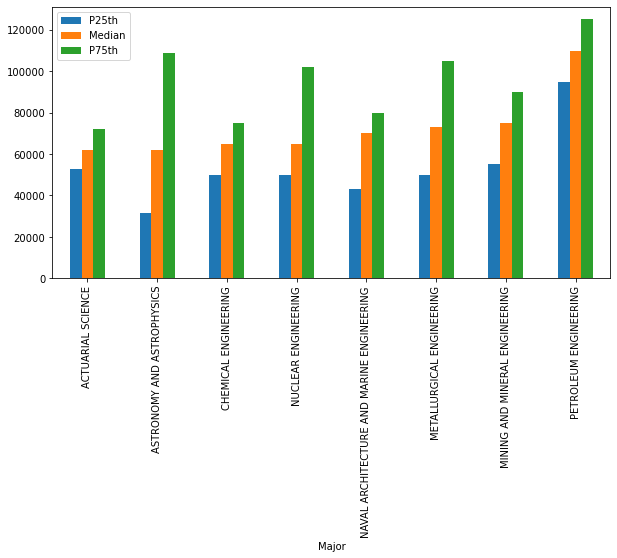

In [93]:
top_medians = df[df["Median"] > 60000].sort_values("Median")

In [18]: top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

25-й і 75-й процентиль підтверджують те, що ми бачили вище: спеціальності нафтової інженерії були, безумовно, найкраще оплачуваними недавніми випускниками.

Чому нас так цікавлять викиди в цьому наборі даних? Якщо ви студент коледжу і розмірковуєте, яку спеціальність вибрати, у вас є принаймні одна досить очевидна причина. Але викиди також дуже цікаві з точки зору аналізу. Вони можуть вказувати не тільки на галузі з надлишком грошей, але й на недійсні дані.

Недійсні дані можуть бути спричинені будь-якою кількістю помилок або недоглядів, включаючи вихід із ладу датчика, помилку під час ручного введення даних, тощо. Дослідження викидів є важливим кроком у очищенні даних.

Навіть якщо дані правильні, ми можемо вирішити, що вони настільки відрізняються від інших, що створюють більше шуму, ніж користі. Припустімо, ми аналізуємо дані про продажі невеликого видавця. Ми групуємо доходи за регіонами та порівнюємо їх із тим самим місяцем попереднього року. Тоді видавець несподівано отримує національний бестселер.

Ця приємна подія робить ваш звіт якимось безглуздим. З урахуванням даних бестселера продажі зростають скрізь. Виконання того самого аналізу без викиду дасть більш цінну інформацію, дозволяючи побачити, що в Нью-Йорку ваші продажі значно покращилися, а в Маямі вони погіршилися.

Часто потрібно перевірити, чи пов’язані два стовпці набору даних. Якщо ви обираєте спеціальність із вищим середнім заробітком, чи є у вас менші шанси отримати безробіття? 

Як перший крок, створімо точкову діаграму з цими двома стовпцями:

<AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>

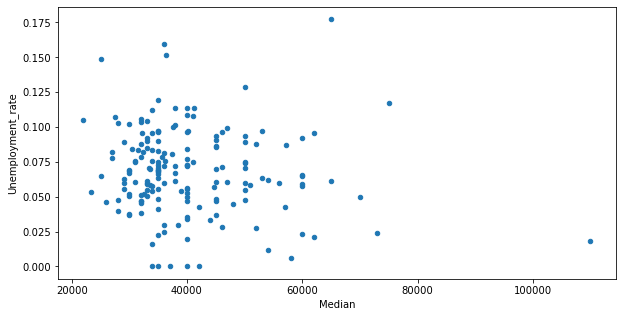

In [81]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

Швидкий погляд на ці цифри показує, що немає істотної кореляції між заробітком і рівнем безробіття.

Хоча діаграма розсіювання є чудовим інструментом для отримання першого враження про можливу кореляцію, вона, звичайно, не є остаточним доказом зв’язку. Для огляду кореляцій між різними стовпцями можна скористатися .corr(). Якщо ми підозрюємо кореляцію між двома значеннями, у нашому розпорядженні є кілька інструментів, щоб перевірити своє передчуття та визначити, наскільки сильна кореляція.

Однак, навіть якщо між двома значеннями існує кореляція, це не означає, що зміна одного призведе до зміни іншого. Іншими словами, кореляція не передбачає причинного зв’язку.

In [82]:
df.corr()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,1.000000,0.108429,0.071137,-0.094780,0.174913,0.643781,0.008492,0.070751,0.034725,0.193174,0.020418,0.090078,0.068900,-0.873308,-0.735688,-0.802686,0.052639,0.144689,0.202920
Major_code,0.108429,1.000000,0.196784,0.179299,0.181459,0.259211,0.206580,0.200925,0.199397,0.195184,0.205634,0.223418,0.126603,-0.176072,-0.166864,-0.094556,0.041198,0.232425,0.225294
Total,0.071137,0.196784,1.000000,0.878088,0.944764,0.142999,0.945575,0.996214,0.989339,0.950268,0.981112,0.974768,0.083192,-0.106738,-0.071926,-0.083198,0.800465,0.941247,0.935510
Men,-0.094780,0.179299,0.878088,1.000000,0.672759,-0.112014,0.875176,0.870605,0.893563,0.751592,0.892454,0.869411,0.101502,0.025991,0.038725,0.052393,0.563168,0.851500,0.791336
Women,0.174913,0.181459,0.944764,0.672759,1.000000,0.297832,0.862606,0.944037,0.917681,0.954513,0.905720,0.911694,0.059108,-0.182842,-0.137738,-0.164528,0.851946,0.872132,0.904470
ShareWomen,0.643781,0.259211,0.142999,-0.112014,0.297832,1.000000,0.097496,0.147547,0.120200,0.212290,0.112523,0.121243,0.073205,-0.618690,-0.500199,-0.586932,0.195550,0.137007,0.187850
Sample_size,0.008492,0.206580,0.945575,0.875176,0.862606,0.097496,1.000000,0.964462,0.978396,0.824824,0.985235,0.918059,0.059872,-0.067578,-0.025229,-0.055737,0.701704,0.915464,0.860319
Employed,0.070751,0.200925,0.996214,0.870605,0.944037,0.147547,0.964462,1.000000,0.995838,0.934528,0.991047,0.968900,0.068056,-0.107547,-0.067514,-0.087560,0.797534,0.941326,0.927224
Full_time,0.034725,0.199397,0.989339,0.893563,0.917681,0.120200,0.978396,0.995838,1.000000,0.900877,0.998203,0.960102,0.063349,-0.082258,-0.042957,-0.065073,0.772515,0.933124,0.904852
Part_time,0.193174,0.195184,0.950268,0.751592,0.954513,0.212290,0.824824,0.934528,0.900877,1.000000,0.880855,0.945094,0.108944,-0.190124,-0.153509,-0.158220,0.804987,0.909634,0.951593


Щоб обробити більші шматки інформації, людський розум свідомо і несвідомо сортує дані за категоріями. Цей прийом часто корисний, але він далеко не бездоганний.

Багато наборів даних уже містять певну явну чи неявну категоризацію. У поточному прикладі 173 спеціальності поділено на 16 категорій.

Основним використанням категорій є групування та агрегування. Ми можемо використовувати .groupby(), щоб визначити, наскільки популярна кожна з категорій у основному наборі даних коледжу:

In [83]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()
cat_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

Давайте намалюємо горизонтальну гістограму, які показує всі підсумки категорії в cat_totals:

<AxesSubplot:ylabel='Major_category'>

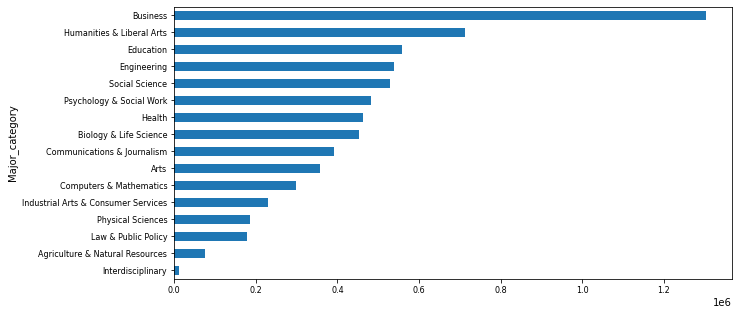

In [85]:
cat_totals.plot(kind="barh", fontsize=8)

Як показує ваш сюжет, бізнес є найпопулярнішою основною категорією. Хоча гуманітарні науки та гуманітарні науки займають явне друге місце, решта галузей більш схожі за популярністю.

Вертикальні та горизонтальні гістограми часто є гарним вибором, якщо ми хочемо побачити різницю між своїми категоріями. Якщо нас цікавлять співвідношення, то кругові діаграми є чудовим інструментом. Однак, оскільки cat_totals містить кілька менших категорій, створення секторної діаграми за допомогою cat_totals.plot(kind="pie") створить кілька крихітних шматочків із мітками, що перекриваються.

Щоб вирішити цю проблему, ми можемо об’єднати менші категорії в одну групу. Об’єднаємо всі категорії із загальною кількістю менше 100 000 у категорію під назвою «Інше», а потім створимо кругову діаграму:

<AxesSubplot:ylabel='Total'>

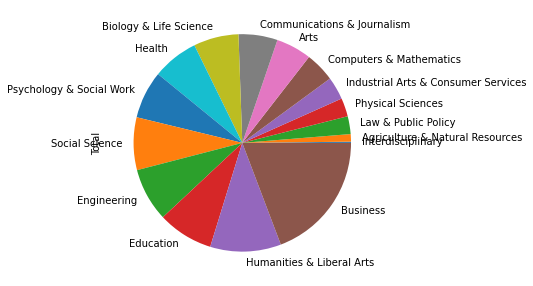

In [86]:
cat_totals.plot(kind="pie")

C:\Users\user\AppData\Local\Temp\ipykernel_9816\3568319403.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big_cat_totals = big_cat_totals.append(small_sums)


<AxesSubplot:>

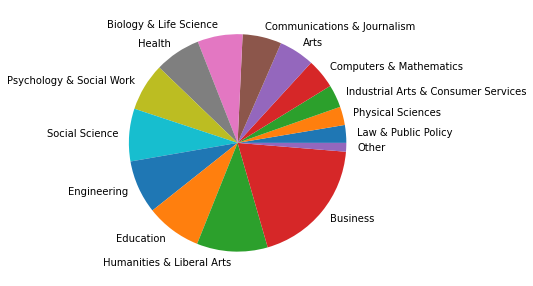

In [87]:
small_cat_totals = cat_totals[cat_totals < 100_000]

big_cat_totals = cat_totals[cat_totals >= 100_000]

small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])

big_cat_totals = big_cat_totals.append(small_sums)

big_cat_totals.plot(kind="pie", label="")

Категорія «Інше» все ще становить лише дуже маленький шматочок кругової діаграми. Це хороший знак того, що об’єднання цих невеликих категорій було правильним вибором.